## Project 

### Import Lib

In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
#permet d'afficher toutes les lignes
#suppress -> chiffres en notation normal et pas en format scientifique
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

### Import data 

In [3]:
na_values = ['na']

In [4]:
data = pd.read_csv('./tm_ok.csv', sep=',',na_values=na_values)

In [5]:
# Filtrage en gardant seulement championnat
data = data.loc[data["League Name"]!='Champions-League']
data = data.loc[data["League Name"]!='Europa-League']
data

Unnamed: 0              Player   Nation    Pos         Squad  Age  \
0              0          Aaron Hunt   de GER  MF,FW  Hamburger SV   30   
1              1        Abdou Diallo   sn SEN     DF      Mainz 05   21   
2              2     Ademola Lookman  eng ENG  MF,FW    RB Leipzig   19   
3              3       Admir Mehmedi   ch SUI  DF,MF    Leverkusen   26   
4              4       Admir Mehmedi   ch SUI  FW,MF     Wolfsburg   26   
...          ...                 ...      ...    ...           ...  ...   
8675       18750  Zlatan Ibrahimović   se SWE     FW         Milan   38   
8676       18751      Álex Berenguer   es ESP     MF        Torino   25   
8677       18752       Álvaro Morata   es ESP     FW      Juventus   27   
8678       18754    Łukasz Skorupski   pl POL     GK       Bologna   29   
8679       18755         Ștefan Radu   ro ROU     DF         Lazio   33   

        Born  MP  Starts     Min  ...  Lost  Won%  League Name  League ID  \
0     1986.0  28      26  2081.0  ...  37.0  37.3   Bundesliga         20   
1     1996.0  27      27  2415.0  ...  28.0  72.5   Bundesliga         20   
2     1997.0  11       7   574.0  ...   6.0  33.3   Bundesliga         20   
3     1991.0  12       8   700.0  ...   5.0  66.7   Bundesliga         20   
4     1991.0   5       3   290.0  ...   8.0  50.0   Bundesliga         20   
...      ...  ..     ...     ...  ...   ...   ...          ...        ...   
8675  1981.0  19      18  1493.0  ...  45.0  62.2      Serie-A         11   
8676  1995.0   2       2   131.0  ...   2.0  33.3      Serie-A         11   
8677  1992.0  32      23  2014.0  ...  32.0  50.0      Serie-A         11   
8678  1991.0  28      28  2520.0  ...   0.0   NaN      Serie-A         11   
8679  1986.0  31      30  2458.0  ...  28.0  62.7      Serie-A         11   

         Season        Player_lower  player_id                       position  \
0     2017-2018          aaron hunt     4687.0  midfield - Attacking Midfield   
1     2017-2018        abdou diallo   229005.0         Defender - Centre-Back   
2     2017-2018     ademola lookman   406040.0           attack - Left Winger   
3     2017-2018       admir mehmedi    66058.0        attack - Second Striker   
4     2017-2018       admir mehmedi    66058.0        attack - Second Striker   
...         ...                 ...        ...                            ...   
8675  2020-2021  zlatan ibrahimovic     3455.0        attack - Centre-Forward   
8676  2020-2021      alex berenguer   338425.0           attack - Left Winger   
8677  2020-2021       alvaro morata   128223.0        attack - Centre-Forward   
8678  2020-2021    lukasz skorupski    80894.0                     Goalkeeper   
8679  2020-2021         stefan radu    44420.0         Defender - Centre-Back   

                     club  market_value  
0            Hamburger SV  1.500000e+06  
1          1.FSV Mainz 05  8.625000e+06  
2              RB Leipzig  1.200000e+07  
3     Bayer 04 Leverkusen  3.500000e+06  
4           VfL Wolfsburg  5.000000e+06  
...                   ...           ...  
8675             AC Milan  4.166667e+06  
8676            Torino FC  6.000000e+06  
8677          Juventus FC  4.500000e+07  
8678      Bologna FC 1909  4.433333e+06  
8679             SS Lazio  2.833333e+06  

[8680 rows x 169 columns]

In [6]:
data['position'].unique()

array(['midfield - Attacking Midfield', 'Defender - Centre-Back',
       'attack - Left Winger', 'attack - Second Striker',
       'midfield - Defensive Midfield', 'attack - Right Winger',
       'attack - Centre-Forward', 'Goalkeeper', 'Defender - Right-Back',
       'midfield - Central Midfield', 'Defender - Left-Back',
       'midfield - Left Midfield', 'midfield - Right Midfield',
       'midfield'], dtype=object)

In [7]:
data = data.loc[(data["position"]=='midfield ') | (data["position"]=='midfield - Defensive Midfield') | \
                          (data["position"]=='midfield - Central Midfield') | (data["position"]=='midfield - Left Midfield') \
                         | (data["position"]=='midfield - Attacking Midfield')| (data["position"]=='midfield - Right Midfield')]
data

Unnamed: 0             Player  Nation    Pos         Squad  Age    Born  \
0              0         Aaron Hunt  de GER  MF,FW  Hamburger SV   30  1986.0   
5              6        Albin Ekdal  se SWE     MF  Hamburger SV   28  1989.0   
6              8  Alessandro Schöpf  at AUT  DF,MF    Schalke 04   23  1994.0   
13            15    Alexandru Maxim  ro ROU  MF,FW      Mainz 05   27  1990.0   
14            17        Amine Harit  ma MAR  MF,FW    Schalke 04   20  1997.0   
...          ...                ...     ...    ...           ...  ...     ...   
8660       18726      Valerio Verre  it ITA     MF     Sampdoria   26  1994.0   
8661       18727      Valon Behrami  ch SUI     MF         Genoa   35  1985.0   
8666       18733   Viktor Kovalenko  ua UKR     FW      Atalanta   24  1996.0   
8671       18739             Walace  br BRA     MF       Udinese   25  1995.0   
8673       18741    Weston McKennie  us USA     MF      Juventus   21  1998.0   

      MP  Starts     Min  ...  Lost   Won%  League Name  League ID     Season  \
0     28      26  2081.0  ...  37.0   37.3   Bundesliga         20  2017-2018   
5     19      12  1108.0  ...  29.0   48.2   Bundesliga         20  2017-2018   
6     15       9   808.0  ...   9.0   40.0   Bundesliga         20  2017-2018   
13    22      11   957.0  ...  16.0   20.0   Bundesliga         20  2017-2018   
14    31      23  2043.0  ...  12.0   42.9   Bundesliga         20  2017-2018   
...   ..     ...     ...  ...   ...    ...          ...        ...        ...   
8660  27      12   998.0  ...  28.0   34.9      Serie-A         11  2020-2021   
8661  26       8   892.0  ...  19.0   44.1      Serie-A         11  2020-2021   
8666   1       0     4.0  ...   0.0  100.0      Serie-A         11  2020-2021   
8671  30      23  2055.0  ...  16.0   44.8      Serie-A         11  2020-2021   
8673  34      18  1702.0  ...  29.0   54.0      Serie-A         11  2020-2021   

           Player_lower  player_id                       position  \
0            aaron hunt     4687.0  midfield - Attacking Midfield   
5           albin ekdal    49275.0  midfield - Defensive Midfield   
6     alessandro schopf   118397.0  midfield - Attacking Midfield   
13      alexandru maxim   129513.0  midfield - Attacking Midfield   
14          amine harit   372711.0  midfield - Attacking Midfield   
...                 ...        ...                            ...   
8660      valerio verre   162961.0    midfield - Central Midfield   
8661      valon behrami    21905.0  midfield - Defensive Midfield   
8666   viktor kovalenko   203842.0  midfield - Attacking Midfield   
8671             walace   323954.0  midfield - Defensive Midfield   
8673    weston mckennie   332697.0    midfield - Central Midfield   

                club  market_value  
0       Hamburger SV  1.500000e+06  
5       Hamburger SV  3.333333e+06  
6      FC Schalke 04  5.000000e+06  
13    1.FSV Mainz 05  2.250000e+06  
14     FC Schalke 04  1.825000e+07  
...              ...           ...  
8660    UC Sampdoria  3.500000e+06  
8661       Genoa CFC  4.333333e+05  
8666     Atalanta BC  5.000000e+06  
8671  Udinese Calcio  5.000000e+06  
8673     Juventus FC  2.400000e+07  

[2521 rows x 169 columns]

### Data preprocessing 

In [8]:
data['Nation'] = data['Nation'].astype('string')
data = data.dropna(subset=['Nation'])
data["Nation_new"] = data['Nation'].apply(lambda x: x[3:7])
data = data.drop(columns=['Nation'])

In [9]:
# Colonnes utiles
mycolumns = ['Player_id','Age','90s','CrdY','CrdR','Gls/90','Ast/90','xG/90','xA/90','Sh/90','SoT/90','Dist','FK','Cmp','Att',\
             'TotDist','PrgDist','Cmp_short','Att_short','Cmp_medium','Att_medium','Cmp_long','Att_long','KP','1/3','PPA',\
             'CrsPA','Prog','SCA90','PassLive','PassDead','Drib','Fld','Def','GCA90','PassLive_AMB','PassDead_AMB','Drib_AMB',\
            'Fld_AMB','Def_AMB','Tkl','TklW','Def 3rd','Mid 3rd','Att 3rd','Tkl_dribble','Past','Succ','Def 3rd_pression', \
             'Mid 3rd_pression','Att 3rd_pression','Touches','Def Pen','Att Pen','Carries','CPA','Fls']

In [10]:
data['Pos']

0       MF,FW
5          MF
6       DF,MF
13      MF,FW
14      MF,FW
        ...  
8660       MF
8661       MF
8666       FW
8671       MF
8673       MF
Name: Pos, Length: 2521, dtype: object

In [11]:
# recodage des modalités
data['Pos'] = data['Pos'].str.split(',')
data['Season'] = data['Season'].str.split('-')

In [12]:
data['Pos']

0       [MF, FW]
5           [MF]
6       [DF, MF]
13      [MF, FW]
14      [MF, FW]
          ...   
8660        [MF]
8661        [MF]
8666        [FW]
8671        [MF]
8673        [MF]
Name: Pos, Length: 2521, dtype: object

In [13]:
data['Pos'] = [elem[0] for elem in data['Pos']]
data['Season'] = [elem[1] for elem in data['Season']]

In [14]:
data['Pos']

0       MF
5       MF
6       DF
13      MF
14      MF
        ..
8660    MF
8661    MF
8666    FW
8671    MF
8673    MF
Name: Pos, Length: 2521, dtype: object

In [15]:
display(data['Pos'],
        data['Season'])

0       MF
5       MF
6       DF
13      MF
14      MF
        ..
8660    MF
8661    MF
8666    FW
8671    MF
8673    MF
Name: Pos, Length: 2521, dtype: object

0       2018
5       2018
6       2018
13      2018
14      2018
        ... 
8660    2021
8661    2021
8666    2021
8671    2021
8673    2021
Name: Season, Length: 2521, dtype: object

In [16]:
data['Player_id']=data['Player']+data['Season']

In [17]:
data['Player_id']

0              Aaron Hunt2018
5             Albin Ekdal2018
6       Alessandro Schöpf2018
13        Alexandru Maxim2018
14            Amine Harit2018
                ...          
8660        Valerio Verre2021
8661        Valon Behrami2021
8666     Viktor Kovalenko2021
8671               Walace2021
8673      Weston McKennie2021
Name: Player_id, Length: 2521, dtype: object

In [18]:
#

In [19]:
data_ok=data[mycolumns]
data_ok

Player_id  Age   90s  CrdY  CrdR  Gls/90  Ast/90  xG/90  \
0            Aaron Hunt2018   30  23.1     1     0    0.13    0.09   0.12   
5           Albin Ekdal2018   28  12.3     3     0    0.00    0.08   0.04   
6     Alessandro Schöpf2018   23   9.0     3     0    0.00    0.00   0.04   
13      Alexandru Maxim2018   27  10.6     4     0    0.19    0.19   0.14   
14          Amine Harit2018   20  22.7     3     0    0.13    0.13   0.13   
...                     ...  ...   ...   ...   ...     ...     ...    ...   
8660      Valerio Verre2021   26  11.1     3     0    0.27    0.27   0.21   
8661      Valon Behrami2021   35   9.9     3     1    0.00    0.00   0.04   
8666   Viktor Kovalenko2021   24   0.0     0     0    0.00    0.00   0.00   
8671             Walace2021   25  22.8     4     0    0.00    0.00   0.03   
8673    Weston McKennie2021   21  18.9     5     0    0.26    0.11   0.22   

      xA/90  Sh/90  ...   Succ  Def 3rd_pression  Mid 3rd_pression  \
0      0.23   1.17  ...  135.0             102.0             261.0   
5      0.08   0.65  ...   86.0              89.0             116.0   
6      0.07   0.89  ...   80.0              84.0             127.0   
13     0.12   2.63  ...   59.0              49.0              95.0   
14     0.20   1.10  ...  152.0              83.0             288.0   
...     ...    ...  ...    ...               ...               ...   
8660   0.16   2.16  ...   62.0              37.0             120.0   
8661   0.01   0.40  ...   58.0             109.0             136.0   
8666   0.00   0.00  ...    2.0               1.0               1.0   
8671   0.02   0.74  ...  139.0             222.0             168.0   
8673   0.15   1.53  ...  105.0             100.0             209.0   

      Att 3rd_pression  Touches  Def Pen  Att Pen  Carries   CPA  Fls  
0                121.0   1475.0     28.0     68.0    892.0   7.0   30  
5                 20.0    692.0     34.0     16.0    422.0   1.0   17  
6                 44.0    542.0     25.0     18.0    338.0   4.0   28  
13                50.0    631.0     10.0     28.0    435.0   4.0   19  
14               157.0   1117.0     10.0     68.0    983.0  25.0   26  
...                ...      ...      ...      ...      ...   ...  ...  
8660              83.0    696.0      8.0     33.0    517.0   1.0   29  
8661              34.0    304.0     17.0      9.0    156.0   1.0   29  
8666               1.0      5.0      1.0      0.0      2.0   0.0    0  
8671              41.0   1416.0     68.0     13.0    977.0   1.0   34  
8673             104.0   1000.0     37.0     81.0    611.0   6.0   49  

[2521 rows x 57 columns]

In [20]:
#Données non normalisées
liste_90 = ['CrdY','CrdR','Dist','FK','Cmp','Att',\
             'TotDist','PrgDist','Cmp_short','Att_short','Cmp_medium','Att_medium','Cmp_long','Att_long','KP','1/3','PPA',\
             'CrsPA','Prog','PassLive','PassDead','Drib','Fld','Def','PassLive_AMB','PassDead_AMB','Drib_AMB',\
            'Fld_AMB','Def_AMB','Tkl','TklW','Def 3rd','Mid 3rd','Att 3rd','Tkl_dribble','Past','Succ','Def 3rd_pression', \
             'Mid 3rd_pression','Att 3rd_pression','Touches','Def Pen','Att Pen','Carries','CPA','Fls']

In [21]:
# Filtres sur les joueurs ayant + de 6 matchs 
data_ok_flt = data_ok.loc[data_ok['90s'] > 6]  

In [22]:
# Boucle pour normaliser les données (qui ne l'étaient pas)
for i in liste_90:
    data_ok_flt[str(i)]=data_ok_flt[str(i)]/data_ok_flt['90s']
del data_ok_flt['90s']
data_ok_flt

Player_id  Age      CrdY     CrdR  Gls/90  Ast/90  xG/90  \
0            Aaron Hunt2018   30  0.043290  0.00000    0.13    0.09   0.12   
5           Albin Ekdal2018   28  0.243902  0.00000    0.00    0.08   0.04   
6     Alessandro Schöpf2018   23  0.333333  0.00000    0.00    0.00   0.04   
13      Alexandru Maxim2018   27  0.377358  0.00000    0.19    0.19   0.14   
14          Amine Harit2018   20  0.132159  0.00000    0.13    0.13   0.13   
...                     ...  ...       ...      ...     ...     ...    ...   
8659  Valentin Eysseric2021   28  0.246914  0.00000    0.25    0.00   0.27   
8660      Valerio Verre2021   26  0.270270  0.00000    0.27    0.27   0.21   
8661      Valon Behrami2021   35  0.303030  0.10101    0.00    0.00   0.04   
8671             Walace2021   25  0.175439  0.00000    0.00    0.00   0.03   
8673    Weston McKennie2021   21  0.264550  0.00000    0.26    0.11   0.22   

      xA/90  Sh/90  SoT/90  ...      Succ  Def 3rd_pression  Mid 3rd_pression  \
0      0.23   1.17    0.26  ...  5.844156          4.415584         11.298701   
5      0.08   0.65    0.08  ...  6.991870          7.235772          9.430894   
6      0.07   0.89    0.33  ...  8.888889          9.333333         14.111111   
13     0.12   2.63    0.47  ...  5.566038          4.622642          8.962264   
14     0.20   1.10    0.40  ...  6.696035          3.656388         12.687225   
...     ...    ...     ...  ...       ...               ...               ...   
8659   0.06   1.60    0.62  ...  4.074074          6.913580          9.629630   
8660   0.16   2.16    0.90  ...  5.585586          3.333333         10.810811   
8661   0.01   0.40    0.10  ...  5.858586         11.010101         13.737374   
8671   0.02   0.74    0.18  ...  6.096491          9.736842          7.368421   
8673   0.15   1.53    0.74  ...  5.555556          5.291005         11.058201   

      Att 3rd_pression    Touches   Def Pen   Att Pen    Carries       CPA  \
0             5.238095  63.852814  1.212121  2.943723  38.614719  0.303030   
5             1.626016  56.260163  2.764228  1.300813  34.308943  0.081301   
6             4.888889  60.222222  2.777778  2.000000  37.555556  0.444444   
13            4.716981  59.528302  0.943396  2.641509  41.037736  0.377358   
14            6.916300  49.207048  0.440529  2.995595  43.303965  1.101322   
...                ...        ...       ...       ...        ...       ...   
8659          3.456790  55.432099  1.481481  2.098765  38.518519  0.370370   
8660          7.477477  62.702703  0.720721  2.972973  46.576577  0.090090   
8661          3.434343  30.707071  1.717172  0.909091  15.757576  0.101010   
8671          1.798246  62.105263  2.982456  0.570175  42.850877  0.043860   
8673          5.502646  52.910053  1.957672  4.285714  32.328042  0.317460   

           Fls  
0     1.298701  
5     1.382114  
6     3.111111  
13    1.792453  
14    1.145374  
...        ...  
8659  1.728395  
8660  2.612613  
8661  2.929293  
8671  1.491228  
8673  2.592593  

[1910 rows x 56 columns]

### Traitement des NaN

In [23]:
data_ok_flt.isna().sum(axis = 0)

Player_id           0
Age                 0
CrdY                0
CrdR                0
Gls/90              0
Ast/90              0
xG/90               0
xA/90               0
Sh/90               0
SoT/90              0
Dist                8
FK                  0
Cmp                 0
Att                 0
TotDist             0
PrgDist             0
Cmp_short           0
Att_short           0
Cmp_medium          0
Att_medium          0
Cmp_long            0
Att_long            0
KP                  0
1/3                 0
PPA                 0
CrsPA               0
Prog                0
SCA90               0
PassLive            0
PassDead            0
Drib                0
Fld                 0
Def                 0
GCA90               0
PassLive_AMB        0
PassDead_AMB        0
Drib_AMB            0
Fld_AMB             0
Def_AMB             0
Tkl                 0
TklW                0
Def 3rd             0
Mid 3rd             0
Att 3rd             0
Tkl_dribble         0
Past      

In [24]:
data_ok_flt=data_ok_flt.drop(columns=['Dist'])

In [25]:
data_ok_flt.to_csv('data_ok_flt')

In [26]:
data_ok_flt

Player_id  Age      CrdY     CrdR  Gls/90  Ast/90  xG/90  \
0            Aaron Hunt2018   30  0.043290  0.00000    0.13    0.09   0.12   
5           Albin Ekdal2018   28  0.243902  0.00000    0.00    0.08   0.04   
6     Alessandro Schöpf2018   23  0.333333  0.00000    0.00    0.00   0.04   
13      Alexandru Maxim2018   27  0.377358  0.00000    0.19    0.19   0.14   
14          Amine Harit2018   20  0.132159  0.00000    0.13    0.13   0.13   
...                     ...  ...       ...      ...     ...     ...    ...   
8659  Valentin Eysseric2021   28  0.246914  0.00000    0.25    0.00   0.27   
8660      Valerio Verre2021   26  0.270270  0.00000    0.27    0.27   0.21   
8661      Valon Behrami2021   35  0.303030  0.10101    0.00    0.00   0.04   
8671             Walace2021   25  0.175439  0.00000    0.00    0.00   0.03   
8673    Weston McKennie2021   21  0.264550  0.00000    0.26    0.11   0.22   

      xA/90  Sh/90  SoT/90  ...      Succ  Def 3rd_pression  Mid 3rd_pression  \
0      0.23   1.17    0.26  ...  5.844156          4.415584         11.298701   
5      0.08   0.65    0.08  ...  6.991870          7.235772          9.430894   
6      0.07   0.89    0.33  ...  8.888889          9.333333         14.111111   
13     0.12   2.63    0.47  ...  5.566038          4.622642          8.962264   
14     0.20   1.10    0.40  ...  6.696035          3.656388         12.687225   
...     ...    ...     ...  ...       ...               ...               ...   
8659   0.06   1.60    0.62  ...  4.074074          6.913580          9.629630   
8660   0.16   2.16    0.90  ...  5.585586          3.333333         10.810811   
8661   0.01   0.40    0.10  ...  5.858586         11.010101         13.737374   
8671   0.02   0.74    0.18  ...  6.096491          9.736842          7.368421   
8673   0.15   1.53    0.74  ...  5.555556          5.291005         11.058201   

      Att 3rd_pression    Touches   Def Pen   Att Pen    Carries       CPA  \
0             5.238095  63.852814  1.212121  2.943723  38.614719  0.303030   
5             1.626016  56.260163  2.764228  1.300813  34.308943  0.081301   
6             4.888889  60.222222  2.777778  2.000000  37.555556  0.444444   
13            4.716981  59.528302  0.943396  2.641509  41.037736  0.377358   
14            6.916300  49.207048  0.440529  2.995595  43.303965  1.101322   
...                ...        ...       ...       ...        ...       ...   
8659          3.456790  55.432099  1.481481  2.098765  38.518519  0.370370   
8660          7.477477  62.702703  0.720721  2.972973  46.576577  0.090090   
8661          3.434343  30.707071  1.717172  0.909091  15.757576  0.101010   
8671          1.798246  62.105263  2.982456  0.570175  42.850877  0.043860   
8673          5.502646  52.910053  1.957672  4.285714  32.328042  0.317460   

           Fls  
0     1.298701  
5     1.382114  
6     3.111111  
13    1.792453  
14    1.145374  
...        ...  
8659  1.728395  
8660  2.612613  
8661  2.929293  
8671  1.491228  
8673  2.592593  

[1910 rows x 55 columns]

In [27]:
#Séparation des variables 
X = data_ok_flt.drop(['Player_id'], axis=1)

In [28]:
# Categorical variable
X_cat = data_ok_flt[['Player_id']]

In [29]:
X_cat

Player_id
0            Aaron Hunt2018
5           Albin Ekdal2018
6     Alessandro Schöpf2018
13      Alexandru Maxim2018
14          Amine Harit2018
...                     ...
8659  Valentin Eysseric2021
8660      Valerio Verre2021
8661      Valon Behrami2021
8671             Walace2021
8673    Weston McKennie2021

[1910 rows x 1 columns]

In [30]:
X.columns

Index(['Age', 'CrdY', 'CrdR', 'Gls/90', 'Ast/90', 'xG/90', 'xA/90', 'Sh/90',
       'SoT/90', 'FK', 'Cmp', 'Att', 'TotDist', 'PrgDist', 'Cmp_short',
       'Att_short', 'Cmp_medium', 'Att_medium', 'Cmp_long', 'Att_long', 'KP',
       '1/3', 'PPA', 'CrsPA', 'Prog', 'SCA90', 'PassLive', 'PassDead', 'Drib',
       'Fld', 'Def', 'GCA90', 'PassLive_AMB', 'PassDead_AMB', 'Drib_AMB',
       'Fld_AMB', 'Def_AMB', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd',
       'Tkl_dribble', 'Past', 'Succ', 'Def 3rd_pression', 'Mid 3rd_pression',
       'Att 3rd_pression', 'Touches', 'Def Pen', 'Att Pen', 'Carries', 'CPA',
       'Fls'],
      dtype='object')

In [31]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer,KNNImputer

In [32]:
imp_num = SimpleImputer(missing_values=np.nan, strategy='mean')
X_new = imp_num.fit_transform(X)
X_new = StandardScaler().fit_transform(X_new)

### Choix du nombre de clusters avec WCSS

In [33]:
wcss = []
K = range(1, 12)
for k in K:
  km = KMeans(n_clusters = k)
  km = km.fit(X_new)
  wcss.append(km.inertia_)

In [34]:
wcss

[103140.0,
 86567.6071427018,
 75173.5359563546,
 70160.12933397715,
 66926.29474309665,
 64489.2681428198,
 62457.04786827175,
 60947.91813110277,
 59532.39453880458,
 58403.53858461128,
 57372.726409314455]

In [35]:
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k');

### PCA (Principal Component Analisys)

In [36]:
pca = PCA(n_components=0.8)
df_pca = pca.fit_transform(X_new)

In [37]:
df_pca

array([[ 3.95051586, -1.10342719, -1.32444964, ...,  0.18761959,
        -0.2716076 , -0.05132811],
       [-3.09175892,  0.45304388,  0.60478382, ...,  0.15623356,
        -0.48084327,  0.36936939],
       [-3.32239917, -0.80138514,  3.69681613, ..., -0.74690026,
        -2.0542078 , -0.18267412],
       ...,
       [-6.6675077 , -4.16427   ,  0.56911868, ...,  1.0662672 ,
        -1.38474414,  1.19357636],
       [-4.1203219 ,  2.30888828,  0.26789729, ..., -0.44503264,
        -0.36485739,  0.44898596],
       [ 0.38426902, -3.2213485 ,  1.77697987, ...,  0.58059004,
         0.68494777,  0.26151347]])

In [38]:
X_new.shape

(1910, 54)

In [39]:
df_pca.shape

(1910, 12)

In [40]:
pca.explained_variance_ratio_

array([0.24251778, 0.21923572, 0.09653068, 0.0552494 , 0.03224154,
       0.02763421, 0.02518963, 0.02340659, 0.02184505, 0.02090919,
       0.01903811, 0.01787773])

In [41]:
exp_var = [round(i, 1) for i in pca.explained_variance_ratio_ * 100]

In [42]:
exp_var

[24.3, 21.9, 9.7, 5.5, 3.2, 2.8, 2.5, 2.3, 2.2, 2.1, 1.9, 1.8]

In [43]:
summ=0
for i in exp_var:
    summ=summ+i

In [44]:
summ

80.2

### Choix du nombre de clusters avec la méthode de la silhouette

 https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

For n_clusters =  2  Average score:  0.18035722626930173
For n_clusters =  3  Average score:  0.1568305149850955
For n_clusters =  4  Average score:  0.10896148907857632
For n_clusters =  5  Average score:  0.08902334487089836
For n_clusters =  6  Average score:  0.08132326137441424
For n_clusters =  7  Average score:  0.08214717069955346
For n_clusters =  8  Average score:  0.07552059119451822
For n_clusters =  9  Average score:  0.07546866119059692
For n_clusters =  10  Average score:  0.07292148286017706
For n_clusters =  11  Average score:  0.07015964195801333


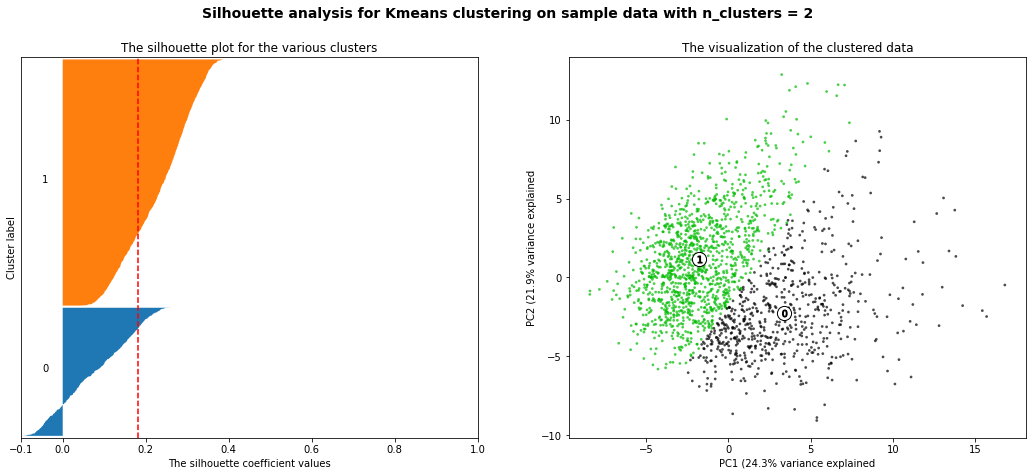

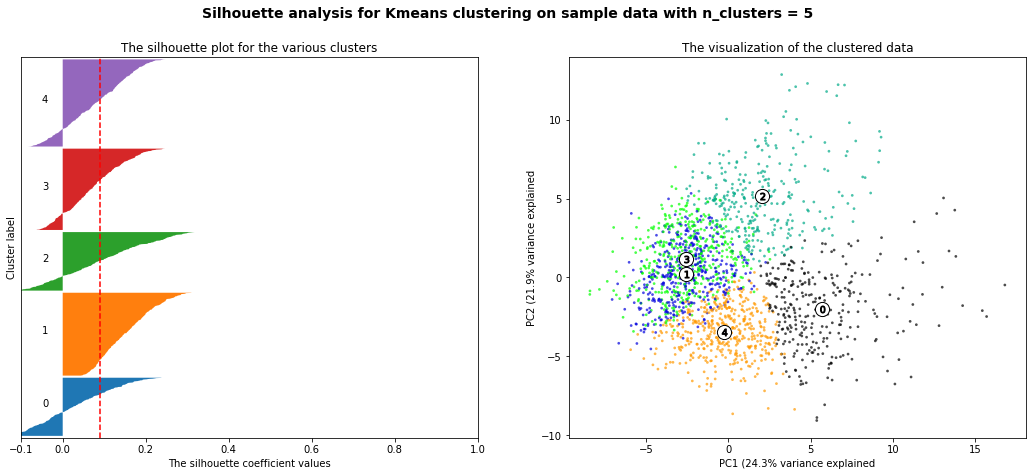

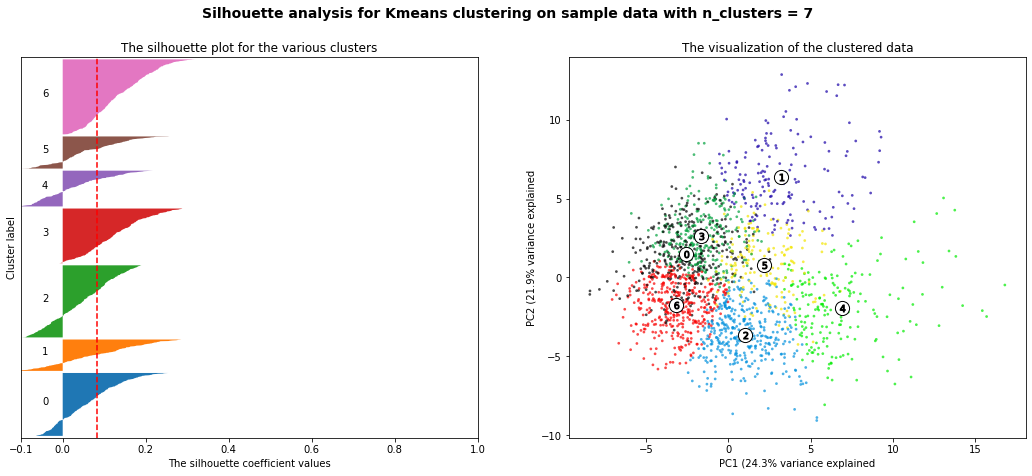

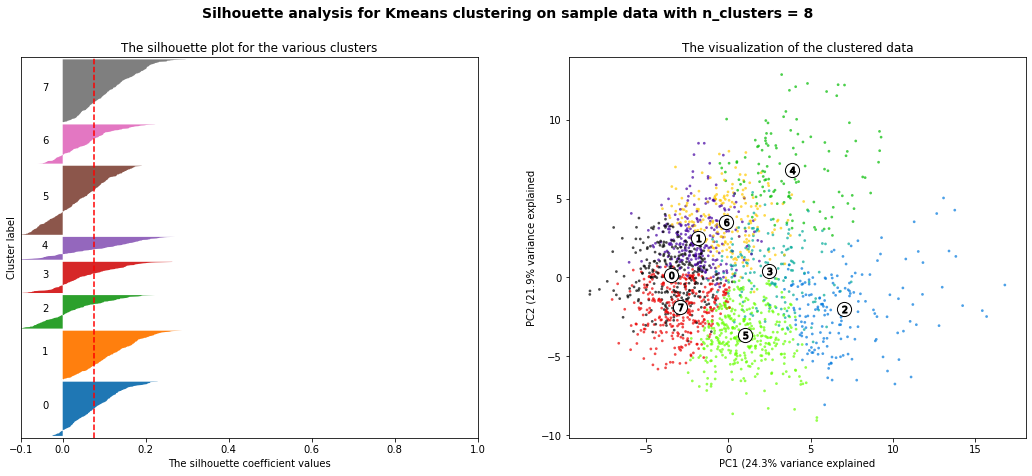

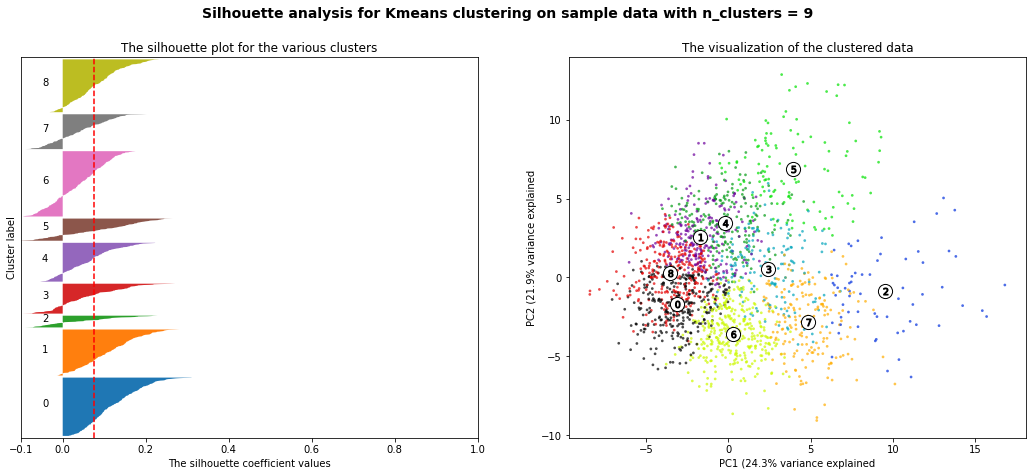

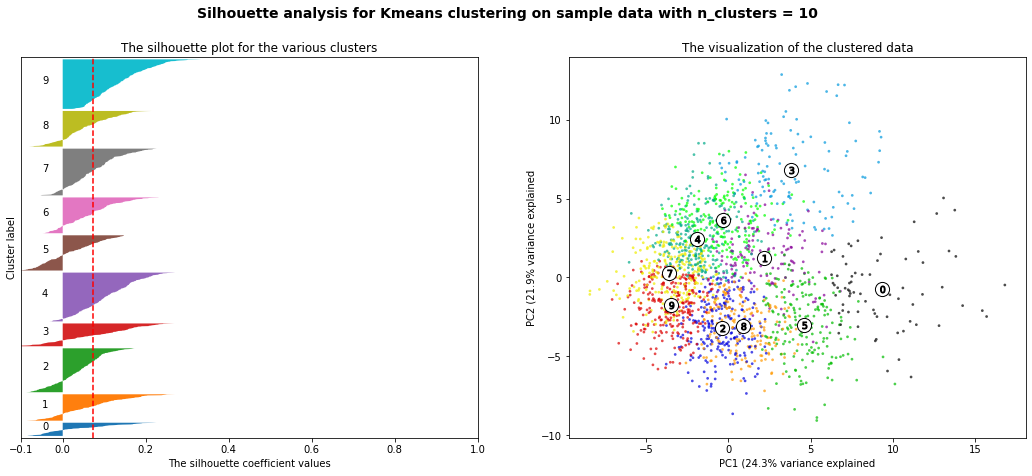

In [45]:
range_n_clusters = range(2, 12)
for n_clusters in range_n_clusters:
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(X_new) + (n_clusters + 1) * 10])

  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(X_new)
  #print(cluster_labels)
  #print(np.unique(cluster_labels))

  silhouette_avg = silhouette_score(X_new, cluster_labels)
  print("For n_clusters = ", n_clusters, " Average score: ", silhouette_avg)

  sample_silhouette_values = silhouette_samples(X_new, cluster_labels)
  #print(sample_silhouette_values)
  #print(len(sample_silhouette_values))

  y_lower = 10
  for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    #print(ith_cluster_silhouette_values.shape)

    size_cluster_i = ith_cluster_silhouette_values.shape[0]

    y_upper = y_lower + size_cluster_i
    #print(y_upper)

    ax1.fill_betweenx(np.arange(y_lower, y_upper), ith_cluster_silhouette_values)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

  ax1.set_title("The silhouette plot for the various clusters")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")   

  ax1.axvline(x = silhouette_avg, color = "red", linestyle = "--")

  ax1.set_yticks([])
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

  centers = clusterer.cluster_centers_
  centers = pca.transform(centers)
  ax2.scatter(centers[:, 0], centers[:,1], marker='o', c='white', alpha=1, s=200, edgecolor='k')

  for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, s=50, edgecolor='k')

  ax2.set_title("The visualization of the clustered data")
  ax2.set_xlabel('PC1 (' + str(exp_var[0]) + '% variance explained')
  ax2.set_ylabel('PC2 (' + str(exp_var[1]) + '% variance explained')

  plt.suptitle(("Silhouette analysis for Kmeans clustering on sample data with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

### Application k-means

In [46]:
import matplotlib
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_new)
clustering=kmeans.labels_
colors = ['red','yellow','blue','pink','green']
plt.figure(figsize=(16,12))
plt.grid(True,which="both", linestyle='--')
plt.scatter(df_pca[:, 0], df_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
#for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    #plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [47]:
km = KMeans(n_clusters=4, n_init=100, random_state=0)
km.fit(X_new)

KMeans(n_clusters=4, n_init=100, random_state=0)

In [48]:
print(km.cluster_centers_)

[[-0.18413254 -0.17807827 -0.08110034  0.03561871 -0.18560347  0.1131634
  -0.16116084  0.11532497  0.09712123 -0.1245553  -0.86641132 -0.88047937
  -0.90183761 -0.8265277  -0.64473858 -0.62743231 -0.86307197 -0.87048473
  -0.79984981 -0.71489502 -0.1696956  -0.77291984 -0.20211971  0.21807731
  -0.71041626 -0.18493947 -0.22002552 -0.20131803  0.06923957  0.19833684
  -0.0359211  -0.17540022 -0.19664218 -0.20606642  0.001498    0.07881361
  -0.01423347 -0.38863818 -0.41603771 -0.33042279 -0.37144477 -0.02903208
  -0.41103596 -0.24286767 -0.19088495 -0.15017704  0.00751805  0.30466834
  -0.88524278 -0.35225244  0.25964279 -0.76555687  0.13925329 -0.00192371]
 [ 0.31886568  0.04593202  0.02393094 -0.25424904  0.15794566 -0.32722145
   0.12039054 -0.29938734 -0.3254245   0.01027728  1.56424538  1.5664054
   1.5716364   1.47698876  1.26384509  1.22624768  1.52088135  1.5298757
   1.29615397  1.09827587  0.25378437  1.50262701  0.313016   -0.17379256
   1.22296677  0.28077372  0.39295453  0

In [49]:
print(km.labels_)

[3 2 2 3 3 2 2 1 2 0 1 2 2 1 2 0 2 2 2 1 2 3 0 0 2 1 2 0 3 2 0 1 2 1 1 2 2
 3 2 2 0 3 3 0 2 2 0 3 0 3 2 0 3 3 2 3 0 3 0 2 2 2 0 0 0 3 0 3 2 1 2 0 2 2
 2 2 0 2 2 1 3 1 0 2 0 0 2 2 0 2 3 2 0 3 2 0 2 2 1 2 1 0 2 2 3 0 0 0 0 1 2
 0 0 3 3 3 2 0 2 3 2 0 2 0 3 0 3 1 2 1 3 1 0 3 1 0 1 2 1 3 0 1 2 3 0 3 3 0
 0 0 0 0 0 0 0 2 1 2 2 0 2 2 2 2 2 3 2 2 2 2 0 0 1 1 1 1 3 2 0 0 0 2 0 0 1
 3 2 1 2 2 2 1 0 2 3 1 3 3 2 2 0 2 1 2 0 2 2 0 2 3 1 3 3 3 2 0 0 3 0 1 0 0
 1 2 2 3 1 3 1 1 1 2 1 3 0 0 0 3 1 1 3 0 2 3 0 2 3 0 0 3 2 2 0 2 2 2 3 2 0
 2 2 2 2 2 0 1 2 2 2 0 2 0 2 0 3 3 0 0 1 3 2 2 0 2 2 0 2 2 3 1 3 3 3 0 2 2
 0 2 0 2 0 1 2 2 3 1 3 3 0 0 0 3 0 1 2 2 2 3 1 1 0 1 3 0 2 0 1 1 2 0 3 3 0
 0 0 1 0 2 3 0 2 2 0 0 3 0 0 2 0 0 0 2 0 2 2 3 0 1 2 0 2 0 2 2 0 1 3 2 0 2
 1 1 1 1 0 2 2 0 2 0 2 2 3 0 2 0 2 3 1 0 2 0 2 0 0 2 3 3 1 2 2 2 2 0 2 3 2
 0 1 1 1 1 0 1 0 0 2 0 2 2 0 3 1 3 3 0 1 2 3 2 0 2 1 1 3 2 2 1 0 2 1 2 0 2
 3 1 1 0 1 2 2 2 3 1 0 2 2 1 2 2 2 0 2 2 2 2 0 0 2 0 0 3 0 0 2 2 3 1 1 1 2
 0 1 0 1 2 2 0 2 2 0 2 0 

In [50]:
len(km.labels_)

1910

In [51]:
km.labels_

array([3, 2, 2, 3, 3, 2, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 3,
       0, 0, 2, 1, 2, 0, 3, 2, 0, 1, 2, 1, 1, 2, 2, 3, 2, 2, 0, 3, 3, 0,
       2, 2, 0, 3, 0, 3, 2, 0, 3, 3, 2, 3, 0, 3, 0, 2, 2, 2, 0, 0, 0, 3,
       0, 3, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 3, 1, 0, 2, 0, 0, 2, 2,
       0, 2, 3, 2, 0, 3, 2, 0, 2, 2, 1, 2, 1, 0, 2, 2, 3, 0, 0, 0, 0, 1,
       2, 0, 0, 3, 3, 3, 2, 0, 2, 3, 2, 0, 2, 0, 3, 0, 3, 1, 2, 1, 3, 1,
       0, 3, 1, 0, 1, 2, 1, 3, 0, 1, 2, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1,
       3, 2, 0, 0, 0, 2, 0, 0, 1, 3, 2, 1, 2, 2, 2, 1, 0, 2, 3, 1, 3, 3,
       2, 2, 0, 2, 1, 2, 0, 2, 2, 0, 2, 3, 1, 3, 3, 3, 2, 0, 0, 3, 0, 1,
       0, 0, 1, 2, 2, 3, 1, 3, 1, 1, 1, 2, 1, 3, 0, 0, 0, 3, 1, 1, 3, 0,
       2, 3, 0, 2, 3, 0, 0, 3, 2, 2, 0, 2, 2, 2, 3, 2, 0, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 2, 0, 2, 0, 2, 0, 3, 3, 0, 0, 1, 3, 2, 2, 0, 2, 2, 0,
       2, 2, 3, 1, 3, 3, 3, 0, 2, 2, 0, 2, 0, 2, 0,

In [52]:
name=['Age','CrdY', 'CrdR', 'Gls/90', 'Ast/90', 'xG/90', 'xA/90', 'Sh/90', 'SoT/90',
       'FK', 'Cmp', 'Att', 'TotDist', 'PrgDist', 'Cmp_short', 'Att_short',
       'Cmp_medium', 'Att_medium', 'Cmp_long', 'Att_long', 'KP', '1/3', 'PPA',
       'CrsPA', 'Prog', 'SCA90', 'PassLive', 'PassDead', 'Drib', 'Fld', 'Def',
       'GCA90', 'PassLive_AMB', 'PassDead_AMB', 'Drib_AMB', 'Fld_AMB',
       'Def_AMB', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd',
       'Tkl_dribble', 'Past', 'Succ', 'Def 3rd_pression', 'Mid 3rd_pression',
       'Att 3rd_pression', 'Touches', 'Def Pen', 'Att Pen', 'Carries', 'CPA',
       'Fls','Group']

In [53]:
name

['Age',
 'CrdY',
 'CrdR',
 'Gls/90',
 'Ast/90',
 'xG/90',
 'xA/90',
 'Sh/90',
 'SoT/90',
 'FK',
 'Cmp',
 'Att',
 'TotDist',
 'PrgDist',
 'Cmp_short',
 'Att_short',
 'Cmp_medium',
 'Att_medium',
 'Cmp_long',
 'Att_long',
 'KP',
 '1/3',
 'PPA',
 'CrsPA',
 'Prog',
 'SCA90',
 'PassLive',
 'PassDead',
 'Drib',
 'Fld',
 'Def',
 'GCA90',
 'PassLive_AMB',
 'PassDead_AMB',
 'Drib_AMB',
 'Fld_AMB',
 'Def_AMB',
 'Tkl',
 'TklW',
 'Def 3rd',
 'Mid 3rd',
 'Att 3rd',
 'Tkl_dribble',
 'Past',
 'Succ',
 'Def 3rd_pression',
 'Mid 3rd_pression',
 'Att 3rd_pression',
 'Touches',
 'Def Pen',
 'Att Pen',
 'Carries',
 'CPA',
 'Fls',
 'Group']

In [54]:
data_final = pd.DataFrame(np.concatenate((X_new,km.labels_.reshape((-1,1))),axis=1),columns=name)

In [55]:
X_cat=X_cat.reset_index(drop=True)
data_final['Player']=X_cat
data_final

Age      CrdY      CrdR    Gls/90    Ast/90     xG/90     xA/90  \
0     1.095037 -1.348492 -0.350416  0.285860 -0.097752  0.222423  1.753347   
1     0.588248  0.095366 -0.350416 -0.875825 -0.193450 -0.718765 -0.223412   
2    -0.678727  0.739023 -0.350416 -0.875825 -0.959035 -0.718765 -0.355196   
3     0.334853  1.055883 -0.350416  0.822022  0.859228  0.457720  0.303724   
4    -1.438912 -0.708882 -0.350416  0.285860  0.285040  0.340072  1.357996   
...        ...       ...       ...       ...       ...       ...       ...   
1905  0.588248  0.117038 -0.350416  1.358184 -0.959035  1.987151 -0.486980   
1906  0.081458  0.285142 -0.350416  1.536904  1.624813  1.281260  0.830860   
1907  2.362012  0.520924  2.984768 -0.875825 -0.959035 -0.718765 -1.145899   
1908 -0.171937 -0.397385 -0.350416 -0.875825 -0.959035 -0.836413 -1.014115   
1909 -1.185517  0.243974 -0.350416  1.447544  0.093644  1.398908  0.699076   

         Sh/90    SoT/90        FK  ...  Mid 3rd_pression  Att 3rd_pression  \
0    -0.037854 -0.345217  2.536940  ...          0.422249          0.953806   
1    -0.791150 -0.979696 -0.485195  ...         -0.219911         -1.063458   
2    -0.443475 -0.098475 -0.485195  ...          1.389169          0.758783   
3     2.077167  0.395009  0.173402  ...         -0.381028          0.662776   
4    -0.139260  0.148267 -0.485195  ...          0.899630          1.891046   
...        ...       ...       ...  ...               ...               ...   
1905  0.585063  0.923741  0.376673  ...         -0.151585         -0.041012   
1906  1.396304  1.910709 -0.485195  ...          0.254510          2.204451   
1907 -1.153311 -0.909199 -0.485195  ...          1.260676         -0.053548   
1908 -0.660772 -0.627208 -0.485195  ...         -0.928999         -0.967272   
1909  0.483658  1.346727 -0.485195  ...          0.339564          1.101552   

       Touches   Def Pen   Att Pen   Carries       CPA       Fls  Group  \
0     0.186126 -0.716657  0.974940 -0.288614  0.108554 -0.595748    3.0   
1    -0.373577  0.512739 -0.315494 -0.650383 -0.615759 -0.463011    2.0   
2    -0.081508  0.523472  0.233687 -0.377605  0.570504  2.288401    2.0   
3    -0.132661 -0.929510  0.737564 -0.085034  0.351358  0.189975    3.0   
4    -0.893508 -1.327822  1.015683  0.105373  2.716290 -0.839743    3.0   
...        ...       ...       ...       ...       ...       ...    ...   
1905 -0.434619 -0.503302  0.311263 -0.296697  0.328530  0.088038    0.0   
1906  0.101344 -1.105887  0.997914  0.380335 -0.587047  1.495123    3.0   
1907 -2.257262 -0.316616 -0.623174 -2.209055 -0.551375  1.999067    0.0   
1908  0.057303  0.685594 -0.889378  0.067305 -0.738066 -0.289374    2.0   
1909 -0.620536 -0.126120  2.029015 -0.816817  0.155691  1.463265    0.0   

                     Player  
0            Aaron Hunt2018  
1           Albin Ekdal2018  
2     Alessandro Schöpf2018  
3       Alexandru Maxim2018  
4           Amine Harit2018  
...                     ...  
1905  Valentin Eysseric2021  
1906      Valerio Verre2021  
1907      Valon Behrami2021  
1908             Walace2021  
1909    Weston McKennie2021  

[1910 rows x 56 columns]

In [56]:
data_final[data_final.Group==0]['Player']

9            Berkay Özcan2018
15          Daniel Didavi2018
22            Fabian Frei2018
23           Filip Kostić2018
27            Iver Fossum2018
                ...          
1899       Soualiho Meïté2021
1903       Tommaso Pobega2021
1905    Valentin Eysseric2021
1907        Valon Behrami2021
1909      Weston McKennie2021
Name: Player, Length: 561, dtype: object

## Comparaison de plusieurs Classifieurs 

In [ ]:
## Comparaison de plusieurs Classifieurs 

from sklearn.model_selection import KFold,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

from sklearn.model_selection import KFold,cross_val_score
import time

clfs = {
    'RF': RandomForestClassifier(n_estimators=100, random_state=1), 
    'ADA': AdaBoostClassifier(n_estimators=100,random_state=1),
    'ET': ExtraTreesClassifier(n_estimators=100,random_state=1),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'CART': DecisionTreeClassifier(criterion='gini',random_state=1),
    'ID3': DecisionTreeClassifier(criterion='entropy',random_state=1),
    'Stumb': DecisionTreeClassifier(criterion='gini',max_depth=1,random_state=1),
    'MLP': MLPClassifier(hidden_layer_sizes=(20,10),random_state=1),
    'XGB': xgb.XGBClassifier(n_estimators=100,random_state=1,colsample_bytree=0.95,max_depth=4,verbosity=0)
}

def run_classifieurs(X,Y,clfs):
    kf = KFold(n_splits=10, shuffle=True, random_state=1) 
    for i in clfs:
        clf = clfs[i]
        debut=time.time()
        cv_acc = cross_val_score(clf, X, Y, cv=kf,scoring='accuracy')
        fin=time.time()
        print("Accuracy for {0} is: {1:.3f} +/- {2:.3f} en {3:.3f}s".format(i,
                                                                            np.mean(cv_acc),
                                                                            np.std(cv_acc),fin-debut))

In [ ]:
X_for_predict = data_final.iloc[:, 0:54].values
Y_for_predict = data_final.iloc[:, 54].values

### Run classifieurs

In [ ]:
run_classifieurs(X_for_predict,Y_for_predict,clfs)

### Création de pipeline

In [ ]:
from sklearn.pipeline import Pipeline
import pickle

In [ ]:
P=Pipeline([('SS',StandardScaler()),
            ('classifieur',MLPClassifier(hidden_layer_sizes=(20,10),random_state=1))])
P.fit(X_for_predict,Y_for_predict)

pickle.dump(P,open('Foot_clfs_players_MLP.pkl','wb'))